In [1]:
import os
os.chdir('..')
import graphs
import ep_utils
from time import perf_counter as pc
import networkx as nx
from collections import Counter
import numpy as np
from matplotlib import pyplot as plt
from tqdm import tqdm
import profile
import pstats

In [2]:
def DuelOfMethods(bertha):
    """compares networkx's normal eigenvalue catching method to our method
    PARAMETERS:
        size (int): how big of graph you want to compare with
    RETURNS:
        our_time (float): how long our method took
        their_time (float): how long their method took
        accurate (bool): if we matched their spectrum
    """
    
    

    # normal method
    start = pc()
    their_spec = nx.adjacency_spectrum(bertha)
    end = pc()
    their_time = end-start
    
    # our method
    start = pc()
    our_spec = ep_utils.GetSpectrumFromLEPs(bertha)
    end = pc()
    our_time = end-start

    
    # check if our spectrums are the same
    accurate = Counter(np.round(np.array(their_spec),2)) == Counter(np.round(our_spec,2))
    
    return our_time, their_time, accurate
    

In [3]:
# generate list of berthas here to avoid having to generate them every time
size_list = [2**i for i in range(3,13)]
berthas = {size: graphs.GenBertha(size) for size in size_list}


In [6]:
size_list = [2**i for i in range(3,13)]
our_times = []
their_times = []
acc_count = []

progress_bar = tqdm(size_list,total=len(size_list))

for size in progress_bar:
    print(size)
    us, them, peter, acc = 0, 0, 0, 0
    iters = 4
    for i in range(iters):
        us_i, them_i, acc_i = DuelOfMethods(berthas[size])
        us, them, acc = us+us_i, them+them_i, acc+acc_i
    us, them, acc = us/iters, them/iters, acc/iters
    our_times.append(us)
    their_times.append(them)
    acc_count.append(acc)
    progress_bar.update()

 20%|██        | 2/10 [00:00<00:00, 10.89it/s]

8
16
32


 80%|████████  | 8/10 [00:00<00:00, 16.85it/s]

64
128
256


100%|██████████| 10/10 [00:03<00:00,  2.12it/s]

512
1024


12it [00:18,  2.73s/it]                        

2048


13it [01:19, 13.46s/it]

4096


100%|██████████| 10/10 [07:11<00:00, 43.12s/it]


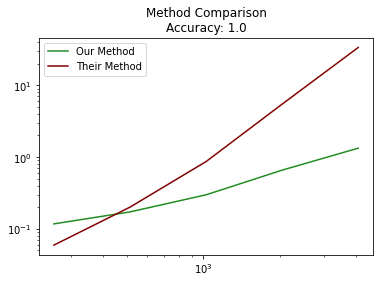

In [7]:
piece = 100
plt.loglog(size_list[5:piece],our_times[5:piece],'-',color='forestgreen',label="Our Method")
plt.loglog(size_list[5:piece],their_times[5:piece],'-',color='maroon',label='Their Method')

plt.title(f"Method Comparison\nAccuracy: {np.sum(acc_count)/len(acc_count)}")
plt.legend()
plt.show()

In [ ]:
#bertha = graphs.GenBertha(1000)
#profile.run("ep_utils.GetSpectrumFromLEPs(bertha)")

In [ ]:
profile.run("ep_utils.GetSpectrumFromLEPs(bertha)")